In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
print("Loading dataset...")

try:
    from google.colab import files
    colab_env = True
except ImportError:
    colab_env = False

file_to_upload = 'bank-additional-full.csv'

if colab_env:
    print(f"Running in Google Colab. Please upload the '{file_to_upload}' file.")
    uploaded = files.upload()

    if file_to_upload not in uploaded:
        print(f"Error: '{file_to_upload}' must be uploaded to proceed.")
        exit()
    print(f"'{file_to_upload}' uploaded successfully to Colab environment.")

try:

    df = pd.read_csv(file_to_upload, sep=';')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: Make sure '{file_to_upload}' is in the same directory.")
    print("If running in Colab, ensure you have uploaded the file.")
    exit()

Loading dataset...
Running in Google Colab. Please upload the 'bank-additional-full.csv' file.


Saving bank-additional-full.csv to bank-additional-full.csv
'bank-additional-full.csv' uploaded successfully to Colab environment.
Dataset loaded successfully.


In [3]:
print("\n--- Dataset Info ---")
print(df.info())
print("\n--- Dataset Head ---")
print(df.head())
print("\n--- Target Variable Distribution (y) ---")
print(df['y'].value_counts())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf

In [4]:
print("\nPreprocessing data...")

if 'duration' in df.columns:
    df = df.drop('duration', axis=1)
    print("Dropped 'duration' column.")

categorical_features = df.select_dtypes(include=['object']).columns.tolist()

if 'y' in categorical_features:
    categorical_features.remove('y')

numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print(f"Categorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

df_encoded['y'] = df_encoded['y'].map({'no': 0, 'yes': 1})

print("\nData after one-hot encoding and target mapping:")
print(df_encoded.head())
print(df_encoded.info())


Preprocessing data...
Dropped 'duration' column.
Categorical features: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
Numerical features: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

Data after one-hot encoding and target mapping:
   age  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56         1    999         0           1.1          93.994   
1   57         1    999         0           1.1          93.994   
2   37         1    999         0           1.1          93.994   
3   40         1    999         0           1.1          93.994   
4   56         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  y  ...  month_may  month_nov  \
0          -36.4      4.857       5191.0  0  ...       True      False   
1          -36.4      4.857       5191.0  0  ...       True      False   
2    

In [5]:
print("\nSplitting data into training and testing sets...")
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print("Data splitting complete.")


Splitting data into training and testing sets...
Training set shape: (28831, 52)
Testing set shape: (12357, 52)
Data splitting complete.


In [6]:
print("\nTraining Decision Tree Classifier...")

dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_classifier.fit(X_train, y_train)
print("Decision Tree Classifier training complete.")


Training Decision Tree Classifier...
Decision Tree Classifier training complete.


In [7]:
print("\nEvaluating model performance...")
y_pred = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)


Evaluating model performance...

Accuracy: 0.9011

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     10965
           1       0.65      0.26      0.37      1392

    accuracy                           0.90     12357
   macro avg       0.78      0.62      0.66     12357
weighted avg       0.88      0.90      0.88     12357


Confusion Matrix:
 [[10769   196]
 [ 1026   366]]



Generating visualizations...


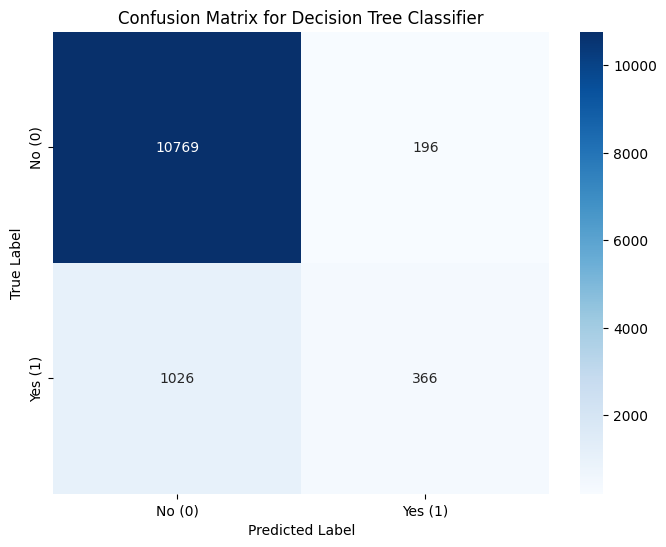

In [8]:
print("\nGenerating visualizations...")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No (0)', 'Yes (1)'], yticklabels=['No (0)', 'Yes (1)'])
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

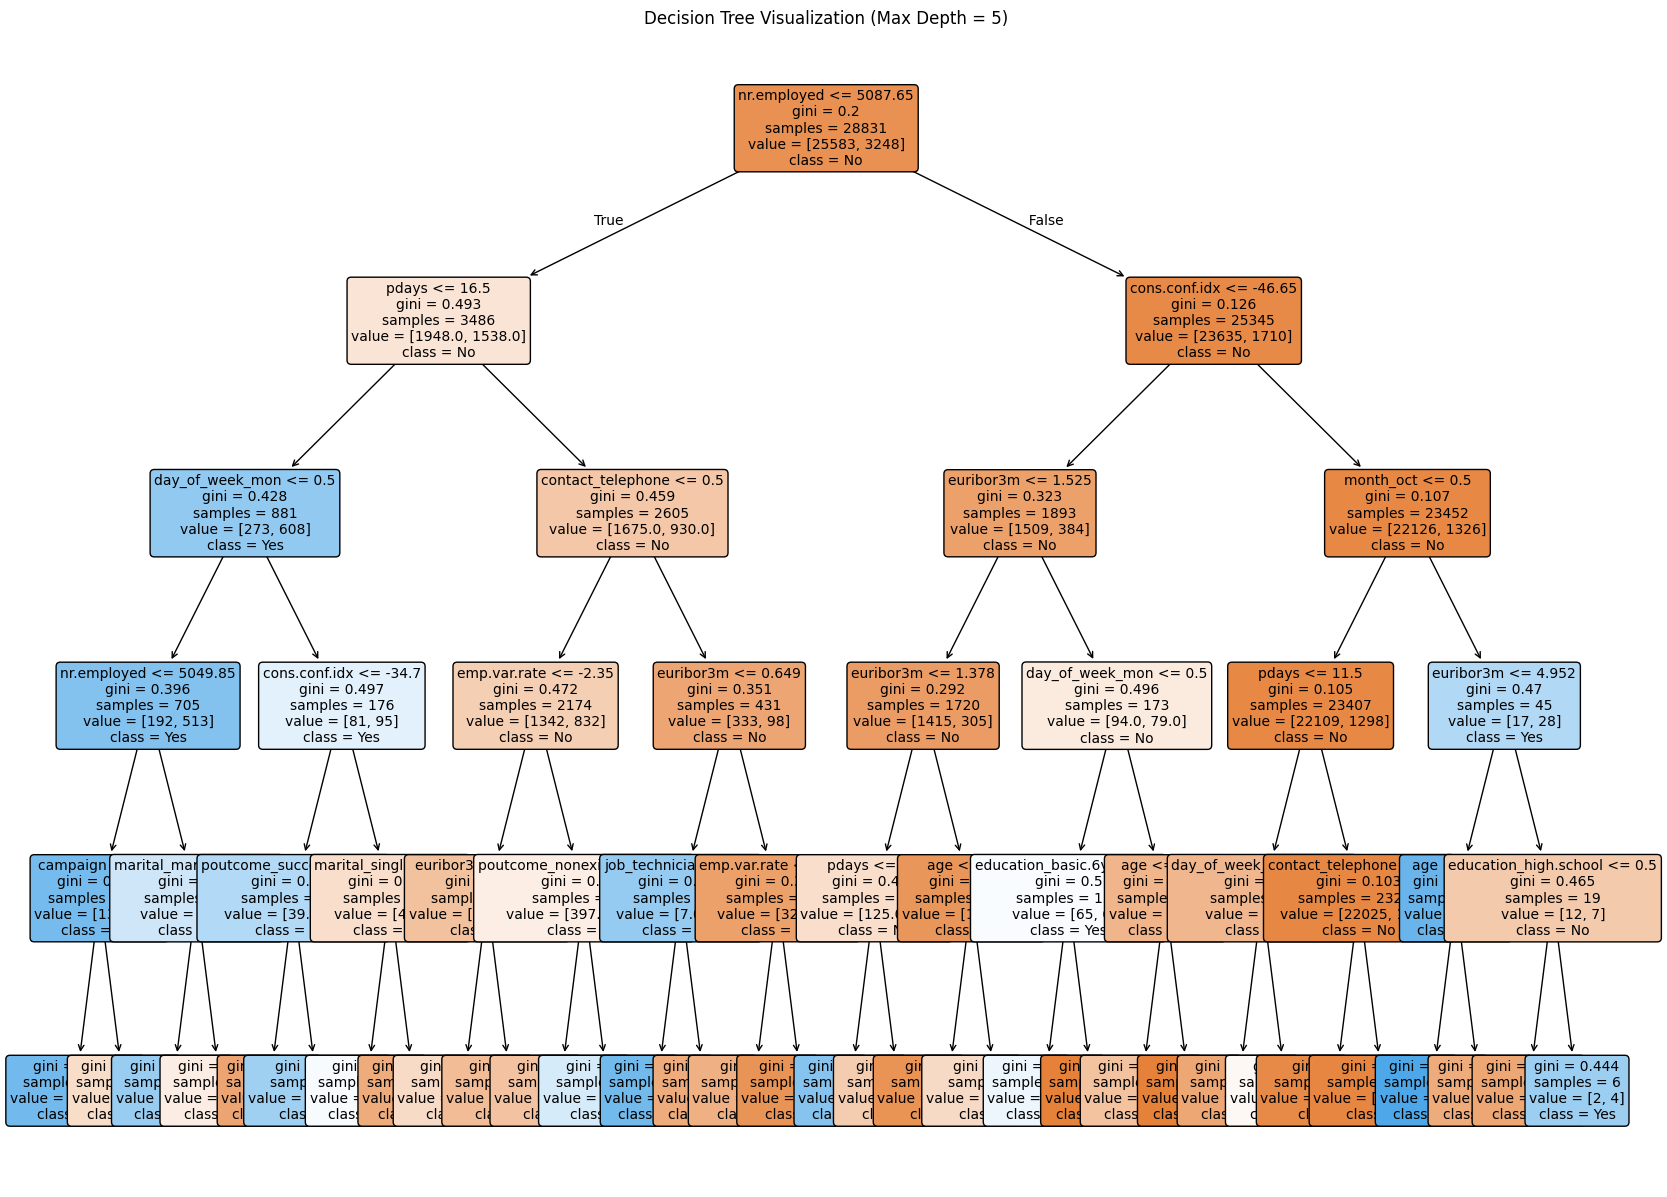

In [9]:
plt.figure(figsize=(20, 15))
plot_tree(dt_classifier,
          feature_names=X.columns.tolist(),
          class_names=['No', 'Yes'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree Visualization (Max Depth = 5)')
plt.show()

In [10]:
print("\nDecision Tree Classifier analysis and visualization complete.")


Decision Tree Classifier analysis and visualization complete.
